# Term1 Sprint10 授業課題 
## コーディング課題：ニューラルネットワーク(NN)スクラッチ

NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していく。  
今回は多クラス分類を行う3層のニューラルネットワークを作成する。  
層の数などは固定した上でニューラルネットワークの基本を確認する。  
次のSprintで層を自由に変えられる設計にしていく。  

**データセットの用意**  
MNISTデータセットを使用する。Kerasによりデータセットをダウンロードし、展開まで行う。  

**MNISTとは**  
画像分類のための定番データセットで、手書き数字認識を行う。  
このデータセットには学習用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかが含まれている。

**画像データとは**  
一般的に白黒画像であればピクセルには0〜255の値が含まれる。  
一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれる。  
機械学習をする上では、この0〜255の値一つひとつが特徴量として扱う。  
0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できる。  

**データセットの確認**  
各データは28×28ピクセルの白黒画像となっている。  

**平滑化**  
(1, 28, 28)の各画像を、(1, 784)に変換する。  
これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱う。  
全てのピクセルが一列になっていることを、平滑化（flatten）してあると表現する。

**補足**  
ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできた。  
その視点ではMNISTは784次元のデータとなる。  
一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼ぶ。  
画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列となる。この視点では2次元のデータである。  
さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列となる。先ほどの視点では3次元のデータになる。  
しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータである。  
画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意する。

**画像データの可視化**  
plt.imshowに渡す。  
[matplotlib.pyplot.imshow — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html "matplotlib.pyplot.imshow — Matplotlib 3.0.2 documentation")



In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyprind
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [16]:
# データ生成
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train.shape: ", X_train.shape) # (60000, 28, 28)
print("X_test.shape: ", X_test.shape) # (10000, 28, 28)
print("X_train[0].dtype: ", X_train[0].dtype) # uint8
print("X_train[0]: ", X_train[0])

# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)
X_train[0].dtype:  uint8
X_train[0]:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93 

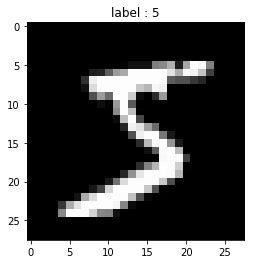

In [17]:
# 画像データの可視化
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

**発展的話題**  
画像データは符号なし8ビット整数のuint8型で保持されることが一般的だが、plt.imshowはより自由な配列を画像として表示することが可能。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならず、先ほどと全く同じように表示される。

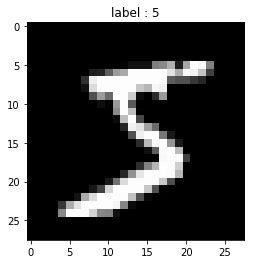

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [18]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからである。  
uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなる。  
それを防ぐためには次のように引数を入れる。  
画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておく。

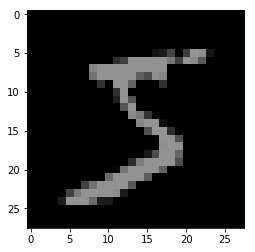

In [19]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

**前処理**  
画像は0から255のuint8型で表されるが、機械学習をする上では0から1のfloat型で扱うことになる。  
色は理想的には連続値で、それを特徴量とするからであり、以下のコードで変換可能。

In [20]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数だが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換する。  
このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱う。

In [10]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


さらに、学習用データ6万枚の内2割を検証用データとして分割する。学習用データが48000枚、検証用データが12000枚となる。

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("X_train.shape: ", X_train.shape) # (48000, 784)
print("X_val.shape: ", X_val.shape) # (12000, 784)

X_train.shape:  (48000, 784)
X_val.shape:  (12000, 784)


## 1. ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成する。  
基本的な構成は機械学習編の線形回帰やロジスティック回帰などと同様なものとなる。

**ミニバッチ処理**  
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していた。  
しかし、ニューラルネットワークではデータを分割して入力する確率的勾配降下法が一般的。  
分割した際のひとかたまりをミニバッチ、そのサンプル数をバッチサイズと呼ぶ。

今回はバッチサイズを10とする。今回使う学習用データは48000枚なので、4800回の更新を繰り返すことになる。  
ニューラルネットワークではこれを4800回イテレーション（iteration）すると呼ぶ。  
学習データを一度全て見ると1回のエポック（epoch）が終わったことになる。  
このエポックを複数回繰り返し、学習が完了する。  

**フォワードプロパゲーション**  
三層のニューラルネットワークのフォワードプロパゲーションを作成する。  
以下の説明ではノード数は1層目は400、2層目は200とするが、変更しても構わない。

各層の数式を以下に示す。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してある。

batch_size = 10 # バッチサイズ  
n_features = 784 # 特徴量の数  
n_nodes1 = 400 # 1層目のノード数  
n_nodes2 = 200 # 2層目のノード数  
n_output = 10 # 出力のクラス数（3層目のノード数）  

「1層目」
$$A_1=X \cdot W_1+B_1$$

- $X$ : 特徴量ベクトル (batch_size, n_features)
- $W_1$ : 1層目の重み (n_features, n_nodes1)
- $B_1$ : 1層目のバイアス (n_nodes1,)
- $A_1$ : 出力 (batch_size, n_nodes1)

「1層目の活性化関数」
$$Z_1=f(A_1)$$
- $f()$ : 活性化関数
- $Z_1$ : 出力 (batch_size, n_nodes1)

「2層目」
$$A_2=Z_1 \cdot W_2+B_2$$
- $W_2$ : 2層目の重み (n_nodes1, n_nodes2)
- $B_2$ : 2層目のバイアス (n_nodes2,)
- $A_2$ : 出力 (batch_size, n_nodes2)

「2層目の活性化関数」
$$Z_2=f(A_2)$$
- $f()$ : 活性化関数
- $Z_2$ :  出力 (batch_size, n_nodes2)

「3層目（出力層）」
$$A_3=Z_2 \cdot W3+B_3$$
- $W_3$ : 3層目の重み (n_nodes2, n_output)
- $B_3$ : 3層目のバイアス (n_output,)
- $A_3$ : 出力 (batch_size, n_output)

「3層目の活性化関数」
$$Z_3=softmax(A_3)$$
- $softmax()$ : ソフトマックス関数
- $Z_3$ : 出力 (batch_size, n_output)

$Z_3$は各ラベル（0〜9）に対する確率の配列である。

**重みの初期値**  
ニューラルネットワークにおいては重みの初期値は重要な要素となる。  
様々な方法が提案されているが、今回はガウス分布による単純な初期化を行う。バイアスに関しても同様。  
発展的な重みの初期化方法については次のSprintで扱う。

**活性化関数（フォワードプロバゲーション）**  
活性化関数を作成し、フォワードプロパゲーションの中で使用する。  
切り替えられるように実装することを推奨するが、片方でも構わない。

「シグモイド関数」  
$$f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}$$
指数関数$exp(−A)$の計算はnp.expを使用する。

「ハイパボリックタンジェント関数」  
次の数式で表されるが、np.tanhひとつで実現できる。
$$f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}$$
＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的。次のSprintで扱う。  

**ソフトマックス関数**  
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用する。  
これも活性化関数の一種だが、多クラス分類の出力層で使われる特性上、区別して扱われることが多い。
$$Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n}exp(A_{3\_i})}$$

- $Z_{3_k}$ : $k$番目のクラスの確率ベクトル (batch_size,)
- $A_{3_k}$ : $k$番目のクラスにあたる前の層からのベクトル (batch_size,)
- $n$ : クラスの数、n_output。今回のMNISTでは10。

分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたもの。  
その中で、分子に$k$番目のクラスを持ってくることで、$k$番目のクラスである確率が求まる。  
これを10クラス分計算し、合わせたものが$Z_3$。  

**交差エントロピー誤差**  
目的関数（損失関数）を作成する。  
多クラス分類の目的関数である交差エントロピー誤差$L$は次の数式。
$$L = - \sum_{i}^{n}Y_i log(Z_{3\_i})$$
$Y_i$ : $i$番目のクラスの正解ラベル（one-hot表現で0か1）

**バックプロパゲーション**  
三層のニューラルネットワークのバックプロパゲーションを作成する。確率的勾配降下法を行う部分。

まず、$i$層目の重みとバイアスの更新式である。  
$W_i$と$B_i$に対し、更新後の$W_i^{\prime}$と$B_i^{\prime}$は次の数式で求められる。
$$W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i})$$
$$B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})$$
$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）  
$\frac{\partial L}{\partial W_i}$ : $W_i$に関する損失$L$の勾配  
$\frac{\partial L}{\partial B_i}$ : $B_i$に関する損失$L$の勾配  
$E()$ : ミニバッチ方向にベクトルの平均を計算

この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様。  
より効果的な更新方法が知られており、それは次のSprintで扱う。
勾配$\frac{\partial L}{\partial W_i}$や$\frac{\partial L}{\partial B_i}$を求めるために、バックプロパゲーションを行う。  
ハイパボリックタンジェント関数を使用した例を載せた。シグモイド関数の場合の数式はその後ろにある。

「3層目」  
$$\frac{\partial L}{\partial A_3} = Z_3 - Y$$
$$\frac{\partial L}{\partial B_3} = \frac{\partial L}{\partial A_3}$$
$$\frac{\partial L}{\partial W_3} = Z_2^T \cdot \frac{\partial L}{\partial A_3}$$
$$\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T$$
$\frac{\partial L}{\partial A_3}$ : $A_3$に関する損失$L$の勾配 (batch_size, n_output)  
$\frac{\partial L}{\partial B_3}$ : $B_3$に関する損失$L$の勾配 (batch_size, n_output)  
$\frac{\partial L}{\partial W_3}$ : $W_3$に関する損失$L$の勾配 (n_nodes2, n_output)  
$\frac{\partial L}{\partial Z_2}$ : $Z_2$に関する損失$L$の勾配 (batch_size, n_nodes2)  
$Z_3$ : フォワードプロパゲーションの出力 (batch_size, n_output)  
$Y$ : 正解ラベルのベクトル (batch_size, n_output)  
$Z^T_2$ : 転置した2層目の出力 (n_nodes2, batch_size)  
$W^T_3$ : 転置した3層目の重み (n_output, n_nodes2)

「2層目」  
$$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} * \{1-tanh^2(A_2)\}$$
$$\frac{\partial L}{\partial B_2} = \frac{\partial L}{\partial A_2}$$
$$\frac{\partial L}{\partial W_2} = Z_1^T \cdot \frac{\partial L}{\partial A_2}$$
$$\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T$$
$\frac{\partial L}{\partial A_2}$ : $A_2$に関する損失$L$の勾配 (batch_size, n_nodes2)  
$\frac{\partial L}{\partial B_2}$ : $B_2$に関する損失$L$の勾配 (batch_size, n_nodes2)  
$\frac{\partial L}{\partial W_2}$ : $W_2$に関する損失$L$の勾配 (n_nodes1, n_nodes2)  
$\frac{\partial L}{\partial Z_1}$ : $Z_1$に関する損失$L$の勾配 (batch_size, n_nodes1)

「1層目」  
$$\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} * \{1-tanh^2(A_1)\}$$
$$\frac{\partial L}{\partial B_1} = \frac{\partial L}{\partial A_1}$$
$$\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}$$
$\frac{\partial L}{\partial A_1}$ : $A_1$に関する損失$L$の勾配 (batch_size, n_nodes1)  
$\frac{\partial L}{\partial B_1}$ : $B_1$に関する損失$L$の勾配 (batch_size, n_nodes1)  
$\frac{\partial L}{\partial W_1}$ : $W_1$に関する損失$L$の勾配 (n_features, n_nodes1)  
$A_1$ : フォワードプロパゲーションの1層目の出力 (batch_size, n_nodes1)  
$X^T$ : 転置した特徴量ベクトル (n_feature, batch_size)  
$W^T_1$ : 転置した1層目の重み (n_nodes1, n_features)  

**補足**  
活性化関数にシグモイド関数を使用した場合は、次のようになる。
$$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} *  \{1-sigmoid(A_2)\}sigmoid(A_2)$$
$$\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} *  \{1-sigmoid(A_1)\}sigmoid(A_1)$$

**推定**  
推定を行うメソッドを作成する。  
フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定する。

## 2. 学習曲線のプロット
学習曲線をプロットする。  
ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要。  
trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要がある。

## 3. 指標値の算出
分類に関する指標値で精度を確認する。

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyprind
from sklearn.preprocessing import OneHotEncoder

class ScratchSimpleNeuralNetworkClassifier():
    """
    シンプルな3層(入力層も含めると4層)ニューラルネットワーク分類器

    Parameters
    ----------
    n_nodes1 : int (default : 400)
        隠れ層1のノード数
    n_nodes2 : int (default : 200)
        隠れ層2のノード数
    n_epochs : int (default : 10)
        エポック回数
    alpha : float (default : 0.01)
        学習率
    batch_size : int (default : 10)
        ミニバッチサイズ
    sigma : float (default : 0.01)
        各層の重み係数の初期値の標準偏差
    activation : str (default : "tanh")
        活性化関数 ("sigmoid"か"tanh"を選択)
    random_seed : int (default : None)
        各層の重み係数の初期化および各エポック毎のデータシャッフル用の擬似乱数シード
    verbose : bool (default : True)
        学習過程を出力しない場合はFalseを設定

    Attributes
    ----------
    self.train_cost_ : list
        1エポック毎の訓練データのコスト関数値（交差エントロピー誤差）
    self.val_cost_ : list
        1エポック毎の検証データのコスト関数値（交差エントロピー誤差）
    self.train_accuracy_ : list
        1エポック毎の訓練データの正解率
    self.val_accuracy_ : list
        1エポック毎の検証データの正解率
    """

    def __init__(self, n_nodes1=400, n_nodes2=200, n_epochs=10, alpha=0.01, 
                 batch_size=10, sigma=0.01, activation="tanh", random_seed=None, verbose=True):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_epochs = n_epochs
        self.alpha = alpha
        self.batch_size = batch_size
        self.sigma = sigma
        self.activation = activation
        self.random_seed = random_seed # バッチ学習用
        self.random = np.random.RandomState(random_seed) # 重み初期化、各epoch毎のデータシャッフル用
        self.verbose = verbose
        
    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X_train : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y_train : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # 出力層のノード数、データの特徴量数
        n_out = np.unique(y_train).shape[0]
        n_features = X_train.shape[1]
        
        # 各層の重み係数の初期値
        self.b_n1 = np.zeros(self.n_nodes1)
        self.w_n1 = self.sigma * self.random.randn(n_features, self.n_nodes1)
        
        self.b_n2 = np.zeros(self.n_nodes2)
        self.w_n2 = self.sigma * self.random.randn(self.n_nodes1, self.n_nodes2)
        
        self.b_out = np.zeros(n_out)
        self.w_out = self.sigma * self.random.randn(self.n_nodes2, n_out)
        
        # コスト関数値、正解率の空リストを生成
        self.train_cost_ = []
        self.val_cost_ = []
        self.train_accuracy_ = []
        self.val_accuracy_ = []
        
        # yラベルをOneHotEncoding
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_onehot = enc.fit_transform(y_train[:, np.newaxis])
        y_val_onehot = enc.transform(y_val[:, np.newaxis])
        
        # 学習の進捗バーを設定
        pbar = pyprind.ProgBar(self.n_epochs * (np.ceil(X_train.shape[0] / self.batch_size).astype(np.int)))
        
        # エポック毎に学習を繰り返す
        for i in range(self.n_epochs):
            get_mini_batch = GetMiniBatch(X_train, y_train_onehot, 
                                          batch_size=self.batch_size, seed=self.random_seed)
            
            # 1エポック毎にバッチデータ生成して学習
            for X_train_batch, y_train_batch in get_mini_batch:
                
                # Forward propagation
                z_n1, a_n1, z_n2, a_n2, z_out, a_out = self._forward(X_train_batch)
                
                # Back propagation(出力層の誤差ベクトル(grad_z_out)から始まる)
                # 出力層の勾配算出
                grad_z_out  = a_out - y_train_batch # shape: (n_samples, n_out)
                grad_b_out = grad_z_out.sum(axis=0) # shape: (n_out,)
                grad_w_out = np.dot(a_n2.T, grad_z_out) # shape: (n_nodes2, n_out)
                # 出力層の重みの更新
                self.w_out -= self.alpha * (grad_w_out / X_train_batch.shape[0])
                self.b_out -= self.alpha * (grad_b_out / X_train_batch.shape[0])
                
                # 隠れ層2の勾配算出
                grad_a_n2 = np.dot(grad_z_out, self.w_out.T) # shape: (n_samples, n_nodes2)
                grad_z_n2  = grad_a_n2 * self._derivative_func(z_n2) # shape: (n_samples, n_nodes2)
                grad_b_n2 = grad_z_n2.sum(axis=0) # shape: (n_nodes2,)
                grad_w_n2 = np.dot(a_n1.T, grad_z_n2) # shape: (n_nodes1, n_nodes2)
                # 隠れ層2の重みの更新
                self.w_n2 -= self.alpha * (grad_w_n2 / X_train_batch.shape[0])
                self.b_n2 -= self.alpha * (grad_b_n2 / X_train_batch.shape[0])
                
                # 隠れ層1の勾配算出
                grad_a_n1 = np.dot(grad_z_n2, self.w_n2.T) # shape: (n_samples, n_nodes1)
                grad_z_n1  = grad_a_n1 * self._derivative_func(z_n1) # shape: (n_samples, n_nodes1)
                grad_b_n1 = grad_z_n1.sum(axis=0) # shape: (n_nodes1,)
                grad_w_n1 = np.dot(X_train_batch.T, grad_z_n1) # shape: (n_features, n_nodes1)
                # 隠れ層1の重みの更新
                self.w_n1 -= self.alpha * (grad_w_n1 / X_train_batch.shape[0])
                self.b_n1 -= self.alpha * (grad_b_n1 / X_train_batch.shape[0])
                
                # 進捗バーを更新
                pbar.update()
            
            # 1エポック毎に訓練データのコスト関数値、正解率を記録
            z_n1, a_n1, z_n2, a_n2, z_out, a_out = self._forward(X_train)
            # コスト関数値
            value1 = y_train_onehot * (np.log(a_out + 1e-05)) # ゼロ除算対策
            value2 = (1. - y_train_onehot) * np.log(1. - a_out + 1e-05) # ゼロ除算対策
            train_cost = -np.sum(value1 + value2)
            self.train_cost_.append(train_cost)
            # 正解率
            y_train_pred = self.predict(X_train)
            train_accuracy = (np.sum(y_train == y_train_pred).astype(np.float)) / y_train.shape[0]
            self.train_accuracy_.append(train_accuracy)
            
            # 検証データがあれば同様に記録
            if X_val is not None and y_val is not None:
                z_n1, a_n1, z_n2, a_n2, z_out, a_out = self._forward(X_val)
                # コスト関数値
                value1 = y_val_onehot * (np.log(a_out + 1e-05)) # ゼロ除算対策
                value2 = (1. - y_val_onehot) * np.log(1. - a_out + 1e-05) # ゼロ除算対策
                val_cost = -np.sum(value1 + value2)
                self.val_cost_.append(val_cost)
                # 正解率
                y_val_pred = self.predict(X_val)
                val_accuracy = (np.sum(y_val == y_val_pred).astype(np.float)) / y_val.shape[0]
                self.val_accuracy_.append(val_accuracy)
        
        # 各コスト関数値を平均値で割る
        self.train_cost_ /= (sum(self.train_cost_) / len(self.train_cost_))
        if len(self.val_cost_) > 0:
            self.val_cost_ /= (sum(self.val_cost_) / len(self.val_cost_))
        
        #verboseをTrueにした際は学習過程などを出力する
        if self.verbose:
            fig, ax = plt.subplots(1, 2, figsize=(20,9))
            ax[0].plot(np.arange(1, len(self.train_cost_)+1), self.train_cost_, 
                       linewidth=2, linestyle="-", marker="o", color="steelblue", label="Train")
            ax[0].set_xlabel("epoch numbers")
            ax[0].set_ylabel("cost value")
            ax[1].plot(np.arange(1, len(self.train_accuracy_)+1), self.train_accuracy_, 
                       linewidth=2, linestyle="-", marker="o", color="steelblue", label="Train")
            ax[1].set_xlabel("epoch numbers")
            ax[1].set_ylabel("accuracy")
            # 検証データも学習したら可視化する
            if len(self.val_cost_) > 0:
                ax[0].plot(np.arange(1, len(self.val_cost_)+1), self.val_cost_, 
                           linewidth=2, linestyle="--", marker="o", color="orangered", label="Validation")
                ax[1].plot(np.arange(1, len(self.val_accuracy_)+1), self.val_accuracy_, 
                       linewidth=2, linestyle="--", marker="o", color="orangered", label="Validation")
            ax[0].legend()
            ax[1].legend()
            plt.show()

    def predict(self, X_test):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X_test : 次の形のndarray, shape (n_samples, n_features)
            テスト用データの特徴量

        Returns
        -------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            予測ラベル
        """
        z_n1, a_n1, z_n2, a_n2, z_out, a_out = self._forward(X_test)
        return np.argmax(z_out, axis=1) # 出力層への入力値で最大のノード位置を出力
    
    def _forward(self, X_train_batch):
        # Forward propagation
        z_n1 = np.dot(X_train_batch, self.w_n1) + self.b_n1 # shape: (n_samples, n_nodes1)
        a_n1 = self._activation_func(z_n1) # shape: (n_samples, n_nodes1)
        z_n2 = np.dot(a_n1, self.w_n2) + self.b_n2 # shape: (n_samples, n_nodes2)
        a_n2 = self._activation_func(z_n2) # shape: (n_samples, n_nodes2)
        z_out = np.dot(a_n2, self.w_out) + self.b_out # shape: (n_samples, n_out)
        a_out = self._softmax_func(z_out) # shape: (n_samples, n_out)
        return z_n1, a_n1, z_n2, a_n2, z_out, a_out
    
    def _softmax_func(self, z):
        z_max = np.max(z, axis=1)
        exp_z = np.exp(z - z_max.reshape(-1, 1)) # z_maxはオーバーフロー対策
        sum_exp_z = np.sum(exp_z, axis=1).reshape(-1, 1)
        return exp_z / sum_exp_z
    
    def _activation_func(self, z_n):
        if self.activation == "tanh":
            return np.tanh(z_n)
        elif self.activation == "sigmoid":
            return 1 / (1 + np.exp(-z_n))
        else:
            raise ValueError("Set \"tanh\" or \"sigmoid\".") 
    
    def _derivative_func(self, z_n):
        if self.activation == "tanh":
            return (1. - (np.tanh(z_n))**2)
        elif self.activation == "sigmoid":
            return z_n * (1. - z_n)
        else:
            raise ValueError("Set \"tanh\" or \"sigmoid\".") 


class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    このクラスをニューラルネットワークのクラス内でインスタンス化し、for文を使うことでミニバッチを取り出す

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size=10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    # 1エポック内でのイテレーション回数を返す
    def __len__(self):
        return self._stop

    # 各イテレーションで使うバッチデータを返す
    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    # イテレーションのカウント数をゼロにする
    def __iter__(self):
        self._counter = 0
        return self

    # 次のイテレーションで使うバッチデータを返す
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]


上記のコードを実際に実行してみる。

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:51:16


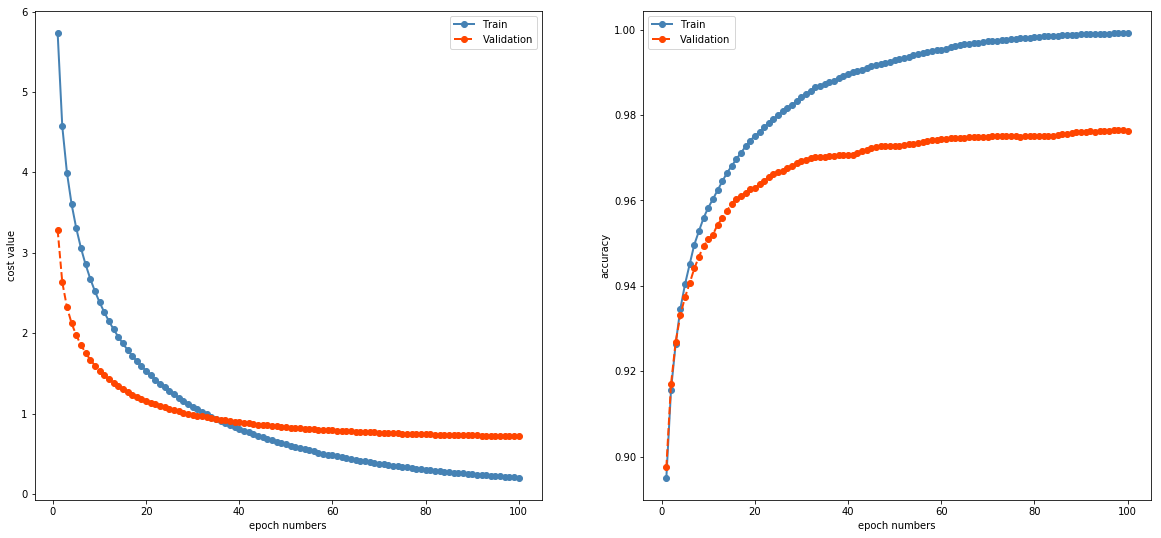

In [128]:
# 実際に実行
scratch_snnc = ScratchSimpleNeuralNetworkClassifier(
    n_nodes1=400, n_nodes2=200, n_epochs=100, alpha=2e-3, 
    batch_size=10, sigma=0.1, activation="tanh", random_seed=0, verbose=True)

scratch_snnc.fit(X_train, y_train, X_val, y_val)

In [129]:
# 最終学習エポックの正解率を出力
final_train_accuracy = scratch_snnc.train_accuracy_[-1].round(4)
final_val_accuracy = scratch_snnc.val_accuracy_[-1].round(4)

# 最終学習エポックの推測ラベルを出力
y_train_pred = scratch_snnc.predict(X_train)
y_val_pred = scratch_snnc.predict(X_val)

# 正解数を算出
train_accuracy_num = (y_train == y_train_pred).sum()
val_accuracy_num = (y_val == y_val_pred).sum()

# 正解率を出力
print("Final train accuracy: {} ({}/{})".format(final_train_accuracy, train_accuracy_num, len(y_train)))
print("Final validation accuracy: {} ({}/{})".format(final_val_accuracy, val_accuracy_num, len(y_val)))

Final train accuracy: 0.9993 (47965/48000)
Final validation accuracy: 0.9763 (11716/12000)


学習率alphaを2e-3から2e-2に変更して再度実行してみる。

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:54:44


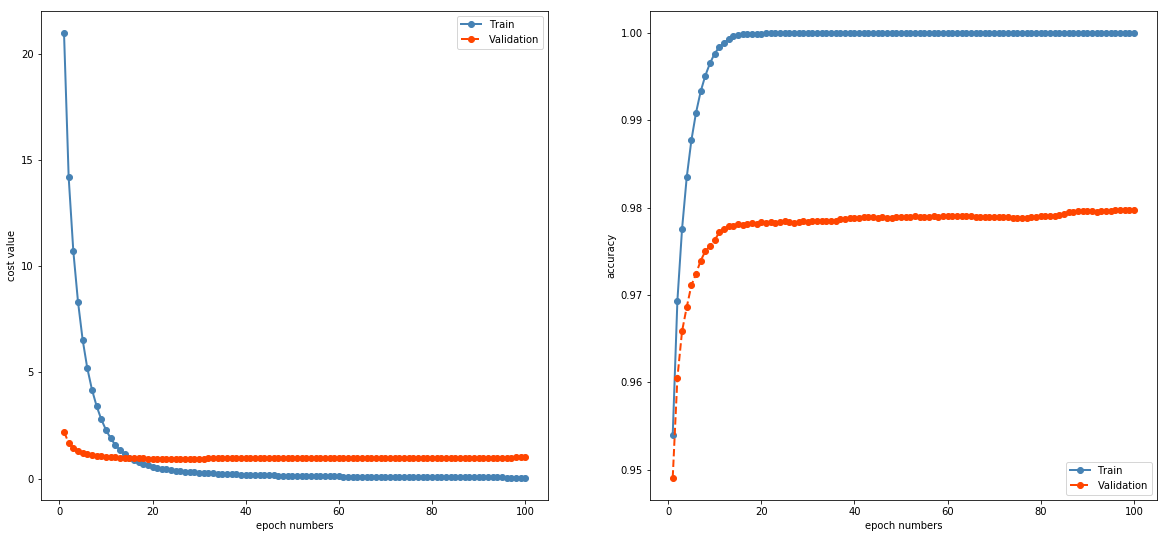

In [130]:
# 実際に実行
scratch_snnc2 = ScratchSimpleNeuralNetworkClassifier(
    n_nodes1=400, n_nodes2=200, n_epochs=100, alpha=2e-2, 
    batch_size=10, sigma=0.1, activation="tanh", random_seed=0, verbose=True)

scratch_snnc2.fit(X_train, y_train, X_val, y_val)

In [131]:
# 最終学習エポックの正解率を出力
final_train_accuracy = scratch_snnc2.train_accuracy_[-1].round(4)
final_val_accuracy = scratch_snnc2.val_accuracy_[-1].round(4)

# 最終学習エポックの推測ラベルを出力
y_train_pred = scratch_snnc2.predict(X_train)
y_val_pred = scratch_snnc2.predict(X_val)

# 正解数を算出
train_accuracy_num = (y_train == y_train_pred).sum()
val_accuracy_num = (y_val == y_val_pred).sum()

# 正解率を出力
print("Final train accuracy: {} ({}/{})".format(final_train_accuracy, train_accuracy_num, len(y_train)))
print("Final validation accuracy: {} ({}/{})".format(final_val_accuracy, val_accuracy_num, len(y_val)))

Final train accuracy: 1.0 (48000/48000)
Final validation accuracy: 0.9798 (11757/12000)


訓練・検証データ両方の正解率が上がった。

エポック数を重ねる毎にコスト値（エントロピー誤差）が下がり続けている。今回は重みの初期値を単純な標準正規分布（ガウス分布）に設定しており、改善の余地があると思われる。各層のノード数や学習率の調整も要検討。過学習対策として、隠れ層・ノード数の調整、正則化、ドロップアウト等の対処も必要。今回は取り急ぎ、実装そのものに焦点を当てて理解を深めた。

**（オプション）誤分類の確認**  

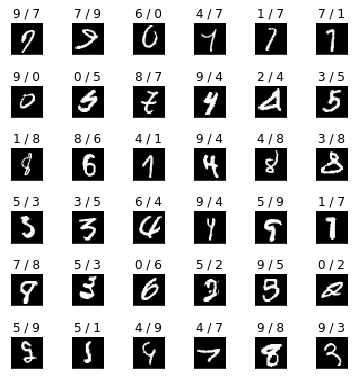

In [132]:
"""
誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
X_val : 検証用データの特徴量（n_samples, n_features)
y_val : 検証用データの正解ラベル(n_samples,)
y_pred : 推定値のndarray (n_samples,)
"""
import numpy as np
import matplotlib.pyplot as plt

y_pred = scratch_snnc2.predict(X_val)

num = 36 # いくつ表示するか

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]], y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
